In [84]:
# Important libraries used
# Basic libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# For statistical tests
import scipy.stats as stats

# For handling multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from lightgbm import LGBMClassifier

# For evaluation
from sklearn.metrics import f1_score,accuracy_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import recall_score,precision_score

# for preprocessing and splitting of the data
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('neo.csv')

In [3]:
df=data.copy()

# About the Data

#### There is an infinite number of objects in the outer space. Some of them are closer than we think. Even though we might think that a distance of 70,000 Km can not potentially harm us, but at an astronomical scale, this is a very small distance and can disrupt many natural phenomena. These objects/asteroids can thus prove to be harmful. Hence, it is wise to know what is surrounding us and what can harm us amongst those. Thus, this dataset compiles the list of NASA certified asteroids that are classified as the nearest earth object.
#### Source: https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects?select=neo.csv

# Data Dictionary
* id : Unique Identifier for each Asteroid
* name: Name given by NASA
* est_diameter_min: Minimum Estimated Diameter in Kilometres
* est_diameter_max: Maximum Estimated Diameter in Kilometres
* relative_velocity: Velocity Relative to Earth
* miss_distance: Distance in Kilometres missed
* orbiting_body: Planet that the asteroid orbits
* sentry_object: Included in sentry - an automated collision monitoring system
* absolute_magnitude: Describes intrinsic luminosity
* hazardous: Boolean feature that shows whether asteroid is harmful or not

# Basic Data Reading and eyeballing

In [4]:
# First five rows of the data
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [5]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [6]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,90836.0,1.438288e+07,2.087202e+07,2.000433e+06,3.448110e+06,3.748362e+06,3.884023e+06,5.427591e+07
est_diameter_min,90836.0,1.274321e-01,2.985112e-01,6.089126e-04,1.925551e-02,4.836765e-02,1.434019e-01,3.789265e+01
est_diameter_max,90836.0,2.849469e-01,6.674914e-01,1.361570e-03,4.305662e-02,1.081534e-01,3.206564e-01,8.473054e+01
relative_velocity,90836.0,4.806692e+04,2.529330e+04,2.033464e+02,2.861902e+04,4.419012e+04,6.292360e+04,2.369901e+05
miss_distance,90836.0,3.706655e+07,2.235204e+07,6.745533e+03,1.721082e+07,3.784658e+07,5.654900e+07,7.479865e+07
absolute_magnitude,90836.0,2.352710e+01,2.894086e+00,9.230000e+00,2.134000e+01,2.370000e+01,2.570000e+01,3.320000e+01


In [7]:
# Categorical summary statitics
df.describe(include=object).T

,count,unique,top,freq
name,90836,27423,469219 Kamo`oalewa (2016 HO3),43
orbiting_body,90836,1,Earth,90836


In [8]:
# Checking for duplicate rows
df.duplicated().value_counts()
# Data has no duplicate rows

False    90836
dtype: int64

In [9]:
# Checking for missing values
df.isnull().sum()
# Data has no missing values

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [10]:
# Corelation Matrix
df.corr()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,sentry_object,absolute_magnitude,hazardous
id,1.000000,-0.148322,-0.148322,-0.059176,-0.056510,NaN,0.277258,-0.123443
est_diameter_min,-0.148322,1.000000,1.000000,0.221553,0.142241,NaN,-0.560188,0.183363
est_diameter_max,-0.148322,1.000000,1.000000,0.221553,0.142241,NaN,-0.560188,0.183363
relative_velocity,-0.059176,0.221553,0.221553,1.000000,0.327169,NaN,-0.353863,0.191185
miss_distance,-0.056510,0.142241,0.142241,0.327169,1.000000,NaN,-0.264168,0.042302
sentry_object,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
absolute_magnitude,0.277258,-0.560188,-0.560188,-0.353863,-0.264168,NaN,1.000000,-0.365267
hazardous,-0.123443,0.183363,0.183363,0.191185,0.042302,NaN,-0.365267,1.000000


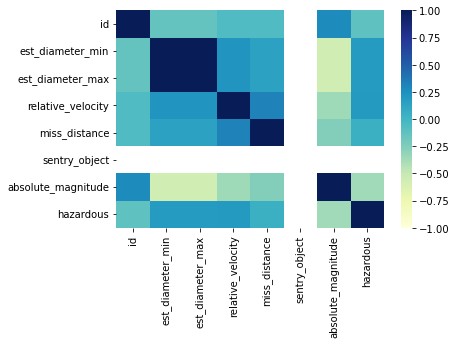

In [11]:
# Vizualization of the correlation matrix
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap='YlGnBu')
plt.show()

In [12]:
# Dropping some redundant column:
# We will drop the orbiting_body and sentry_object columns because these 2 only have one kind of values namely,Earth and False.
# We would also be dropping the id column as well
df.drop(columns=['orbiting_body','sentry_object','name','id'],inplace=True)

# Exploratory Data Analysis

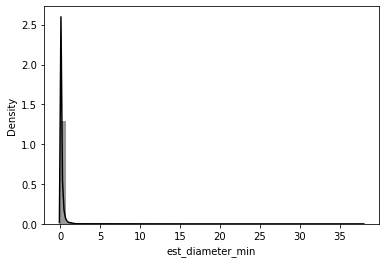

In [13]:
## Column: est_diameter_min
sns.distplot(df.est_diameter_min,color='black')
plt.show()

#### We see that most of the asteroids are less than 2.5 kms in estimated minimum diameter. There are records of higher diameter asteroids as well(20+ km). These could be more hazardous than the smaller ones. We would check this further

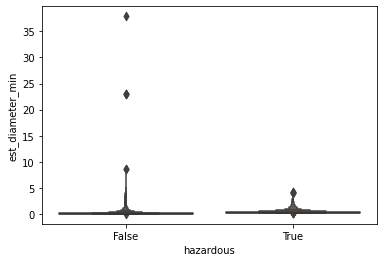

In [14]:
sns.boxenplot(x='hazardous',y='est_diameter_min',data=df)
plt.show()

#### We see that non hazardous objects have the highest minimum diameter but hazardous objects on average have a higher minimum diameter

## Column: est_diameter_max

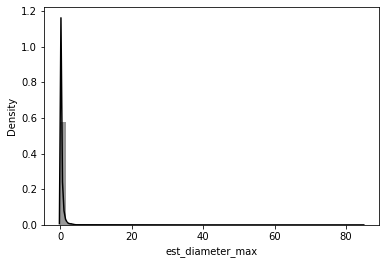

In [15]:
sns.distplot(df.est_diameter_max,color='black')
plt.show()

#### Similar to our observation on est_diameter_min we see that most objects have estimated max diameter less than 2.5 kms

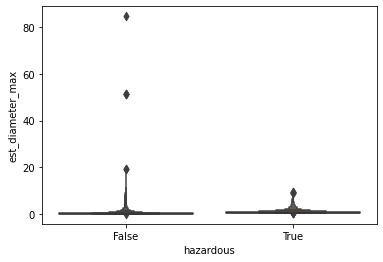

In [16]:
sns.boxenplot(x='hazardous',y='est_diameter_max',data=df)
plt.show()

#### We see that non hazardous objects have the highest maximum diameter but hazardous objects on average have a higher maximum diameter

## Column: relative_velocity

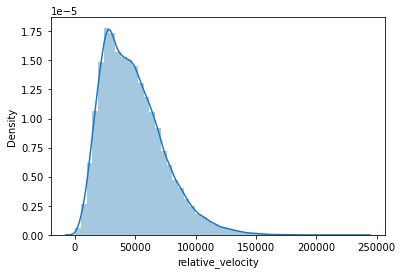

In [17]:
sns.distplot(df.relative_velocity)
plt.show()

#### We see that most objects have a relative velocity between 0 and 150000 km/hr

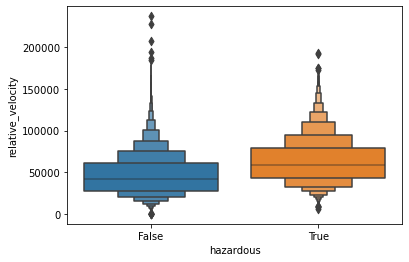

In [18]:
sns.boxenplot(x='hazardous',y='relative_velocity',data=df)
plt.show()

#### We see that the maximum relative velocity of non-hazardous objects in higher thn hazardous objects, but on average the relative velocity of hazardous objects is higher

## Column: miss_distance

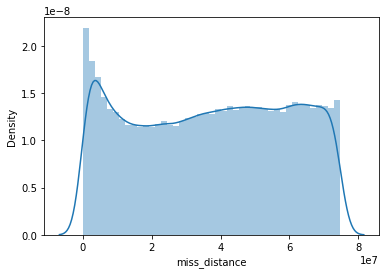

In [19]:
sns.distplot(df.miss_distance)
plt.show()

#### We see that most objects miss Earth by a distance between 0.1x10^7 and 7.8x10^7

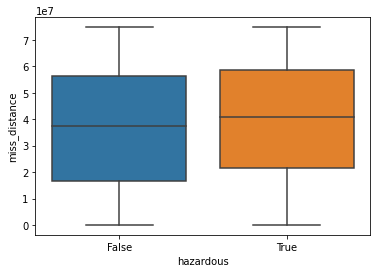

In [20]:
sns.boxplot(x='hazardous',y='miss_distance',data=df)
plt.show()

#### We see that the average miss distance of hazardous objects is slightly higher than miss distance of non-hazardous objects

## Column: absolute_magnitude

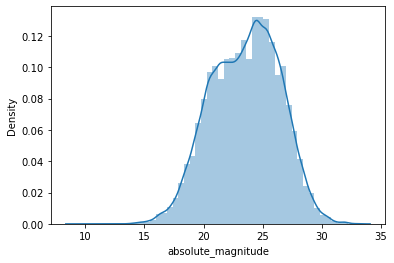

In [21]:
sns.distplot(df.absolute_magnitude)
plt.show()

#### We see that the absolute magnitude(intrinsic luminosity) of most objects is between 15 and 30 units

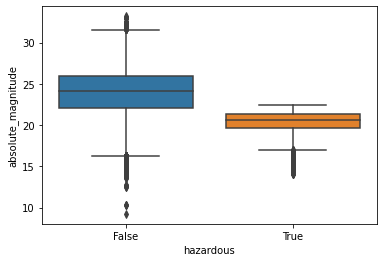

In [22]:
sns.boxplot(x='hazardous',y='absolute_magnitude',data=df)
plt.show()

#### We see that non-hazardous objects have a much higher absolute magnitude compared to hazardous objects

## Column: hazardous

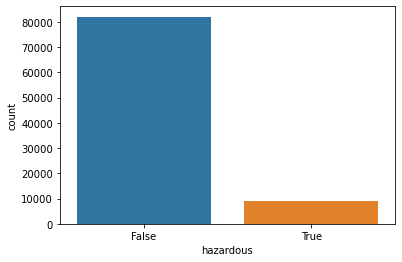

In [23]:
sns.countplot(x='hazardous',data=df)
plt.show()

#### We see that the number of hazardous objects is extremely small compared to our non-hazardous objects. This shows that our target variable is highly imbalanced.

### Conclusion from the Exploratory Data Analysis
* We should be focused more towards larger asteriods as they seem to be more hazardous than smaller asteroids.
* We see that most objects have a relative velocity between 0 and 150000 km/h. Also Hazardous objects seems to be having a higher relative velocity on average.
* We see that most objects miss Earth by a distance between 0.1x10^7 and 7.8x10^7 units. Also, Hazarous objects seem to be missing earth by a higher distance on average
* We see that the absolute magnitude(intrinsic luminosity) of most objects is between 15 and 30 units. Also the intrinsic luminosity of hazardous objects is much lower than non-hazardous objects. This entails that it is much harder to detect hazardous objects than non-hazardous objects
* By the current repository of data, hazardous objects seem to be much less in number compared to non-hazardous objects. This could be followed from the previous point due to hazardous objects being difficult to detect with a much a lower intrisic luminosity.

# Feature Engineering and Feature Selection

## Feature Engineering

In [24]:
# Before proceeding to our feature selection we would do some feature engineering if possible

In [25]:
# Taking the average of est_diameter_min and est_diameter_max to make a new feature est_diameter_avg
df['est_diameter_avg']=(df.est_diameter_max+df.est_diameter_min)/2

## Feature Selection

In [26]:
# Since in our dataframe all our features are numerical
# We would use 2 sample ttest to check the effect of these column on the target variable

stat_df=pd.DataFrame() # Empty dataframe that would contain the features and the pvalue for the statistical test
stat_df['Features']=df.drop(columns='hazardous').columns # Creating column for all the features
lst=[] # Empty list to contain all the pvalues of the tests

for i in df.drop(columns='hazardous').columns:
    # Null Hypothesis: 'i' has no impact on the target variable
    # Alternate Hypothesis: 'i' has an impact on the target variable
    haz_sample=df.loc[df.hazardous==True,i]
    nonhaz_sample=df.loc[df.hazardous==False,i]
    lst.append(stats.ttest_ind(haz_sample,nonhaz_sample)[1])
stat_df['Pvalue']=lst

stat_df

,Features,Pvalue
0,est_diameter_min,0.000000e+00
1,est_diameter_max,0.000000e+00
2,relative_velocity,0.000000e+00
3,miss_distance,2.927203e-37
4,absolute_magnitude,0.000000e+00
5,est_diameter_avg,0.000000e+00


In [27]:
# From the above test df we see that all the features have an impact on our target variable
# So we cannot drop any of the features mentioned above

# Splitting the data into train and test

In [28]:
# Mapping the target variable to 1 and 0
df.hazardous=df.hazardous.map({True:1,False:0})

In [29]:
# Splitting the data into x and y
x=df.drop(columns='hazardous')
y=df.hazardous

In [30]:
# Train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y)

In [31]:
# Shape of the train and test sets
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((72668, 6), (72668,), (18168, 6), (18168,))

## Creating an Evaluation Function

In [32]:
# Before proceeding to our modelling we will create a function to check th evaluation scores

def evaluation(y_test,y_pred):
    
    print('Accuracy Score:',accuracy_score(y_test,y_pred))
    print('f1_score:',f1_score(y_test,y_pred))
    print('Precision:',precision_score(y_test,y_pred))
    print('Recall:',recall_score(y_test,y_pred))
    print('Classification report:\n',classification_report(y_test,y_pred))
    cm=confusion_matrix(y_test,y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title('Confusion matrix for the given prediction')
    plt.show()
    
# Our evaluation fucntion is now created

# Modelling

In [33]:
# We will first try a few basic base models first and then try tune the best model we get

## Logistic regression

In [34]:
# Since Logistic Regression is a distance based algorithm we would need to scale our train and test sets
# before procedding to our model fitting
# For this we would use Standard scaler

sc=StandardScaler()

x_train_s=pd.DataFrame(sc.fit_transform(x_train),columns=x_train.columns)
x_test_s=pd.DataFrame(sc.transform(x_test),columns=x_test.columns)

# Our train and test sets are now scaled

In [35]:
# We will now proceed to our modelling
lr=LogisticRegression() # Machine instance

In [36]:
lr_model=lr.fit(x_train_s,y_train)
y_pred=lr_model.predict(x_test_s)

#### Evaluation

Accuracy Score: 0.8999889916336415
f1_score: 0.12349252291365172
Precision: 0.419672131147541
Recall: 0.07239819004524888
Classification report:
               precision    recall  f1-score   support

           0       0.91      0.99      0.95     16400
           1       0.42      0.07      0.12      1768

    accuracy                           0.90     18168
   macro avg       0.66      0.53      0.54     18168
weighted avg       0.86      0.90      0.87     18168



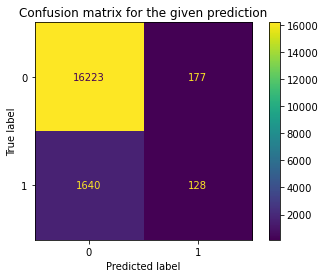

In [37]:
# We will see a few metrics and check how our model is performing
evaluation(y_test,y_pred)

#### We see that although the accuracy is pretty good with 90% score, we get a very low recall score. As a result there are a large number of false negatives in the prediction. We would need to improve our recall score in order to get very few number of false negatives. Hereon we would be mostly focusing on recall to be improved.

## Decision Tree

In [38]:
dtree=DecisionTreeClassifier()

In [39]:
# Since Decision trees are tree base models we don't need to fit the model on a scaled data so we would pass the initial spilit
# train and test sets
dt_model=dtree.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

Accuracy Score: 0.8958058124174373
f1_score: 0.463283243549759
Precision: 0.46446844798180786
Recall: 0.46210407239819007
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     16400
           1       0.46      0.46      0.46      1768

    accuracy                           0.90     18168
   macro avg       0.70      0.70      0.70     18168
weighted avg       0.90      0.90      0.90     18168



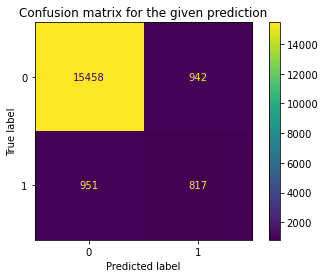

In [40]:
# Evalutaion of the model
evaluation(y_test,y_pred)

#### We see that there is a considerable improvement in our f1 score and recall score compared to a linear based model. So we would go ahead with tree based models further down the line.

## Random Forrest

In [41]:
rf=RandomForestClassifier()

In [42]:
# Fitting and predicting
y_pred=rf.fit(x_train,y_train).predict(x_test)

Accuracy Score: 0.9193637164244826
f1_score: 0.5115038346115373
Precision: 0.6230706742485784
Recall: 0.4338235294117647
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96     16400
           1       0.62      0.43      0.51      1768

    accuracy                           0.92     18168
   macro avg       0.78      0.70      0.73     18168
weighted avg       0.91      0.92      0.91     18168



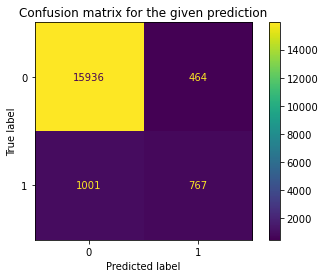

In [43]:
# evaluation of the model
evaluation(y_test,y_pred)

#### We see that random forrest has a similar recall to decision tree but a better f1 score we could try boosting techniques further down the line

## Gradient Boosting

In [44]:
# We will now try some boosting techinques starting with gradient boosting
gb=GradientBoostingClassifier()

In [45]:
# Fitting the model
gb_model=gb.fit(x_train,y_train)

In [46]:
# making predictions
y_pred=gb_model.predict(x_test)

Accuracy Score: 0.9124834874504624
f1_score: 0.23777564717162034
Precision: 0.779874213836478
Recall: 0.14027149321266968
Classification report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     16400
           1       0.78      0.14      0.24      1768

    accuracy                           0.91     18168
   macro avg       0.85      0.57      0.60     18168
weighted avg       0.90      0.91      0.88     18168



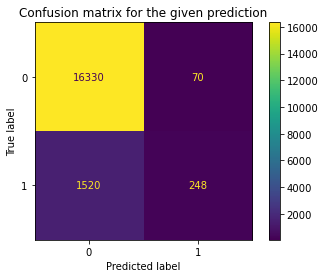

In [47]:
# evaluation of the model
evaluation(y_test,y_pred)

#### We observe that in gradient boosting the recall score has drastically decreased from our random forrest model. This could mean we may have to proceed with other tree based models as well

## XGBoost

In [48]:
# We will see whether xgboost performs any better
xgb=XGBClassifier()

In [49]:
# Fitting and prediction
y_pred=xgb.fit(x_train,y_train).predict(x_test)

Accuracy Score: 0.9182628797886394
f1_score: 0.37209302325581395
Precision: 0.7370184254606366
Recall: 0.248868778280543
Classification report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     16400
           1       0.74      0.25      0.37      1768

    accuracy                           0.92     18168
   macro avg       0.83      0.62      0.66     18168
weighted avg       0.91      0.92      0.90     18168



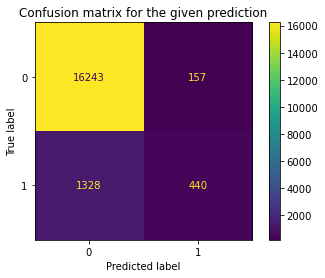

In [50]:
# Evaluation
evaluation(y_test,y_pred)

#### We see that xgboost is giving a similar efficiency as gradient boosting.

# Trying to improve model

In [54]:
# Checking for Multicolinearity
vif=pd.DataFrame()

# creating the features column
vif['Features']=df.drop(columns='hazardous').columns

# creating the vif column
vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.drop(columns='hazardous').shape[1])]

vif

,Features,VIF
0,est_diameter_min,inf
1,est_diameter_max,inf
2,relative_velocity,5.181824
3,miss_distance,4.071148
4,absolute_magnitude,4.697676
5,est_diameter_avg,1.181303


#### We can clearly see that there is high multicolineraity in min estimated diameter and maximum estimated diameter. So, we will drop these two columns, since we already have their average column

In [56]:
df.drop(columns=['est_diameter_min','est_diameter_max'],inplace=True)

#### Let us see whether it improves the performance

In [64]:
# Splitting the data again
x=df.drop(columns='hazardous')
y=df.hazardous
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,stratify=y)

In [65]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((72668, 4), (18168, 4), (72668,), (18168,))

In [66]:
# Let us move ahead with our Random Forrest Model since it was working best overall
rf=RandomForestClassifier()
rf_model=rf.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

Accuracy Score: 0.9145750770585646
f1_score: 0.45998608211551845
Precision: 0.5976491862567812
Recall: 0.373868778280543
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     16400
           1       0.60      0.37      0.46      1768

    accuracy                           0.91     18168
   macro avg       0.77      0.67      0.71     18168
weighted avg       0.90      0.91      0.91     18168



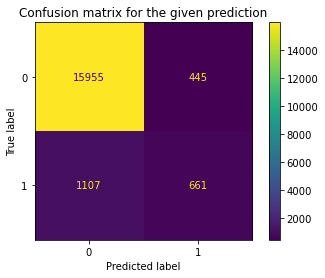

In [67]:
# Evaluation of the random forrest model
evaluation(y_test,y_pred)

#### We still are not able to get a better recalll score score. This is because of the balancing issue. We will now try to increase class weightage to check whether we get a better recall score

In [82]:
# Initilizing Random forrest model again
rf=RandomForestClassifier(class_weight={0:2.5,1:1})
rf_model=rf.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

Accuracy Score: 0.916116248348745
f1_score: 0.4726643598615917
Precision: 0.6087344028520499
Recall: 0.38631221719457015
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     16400
           1       0.61      0.39      0.47      1768

    accuracy                           0.92     18168
   macro avg       0.77      0.68      0.71     18168
weighted avg       0.90      0.92      0.91     18168



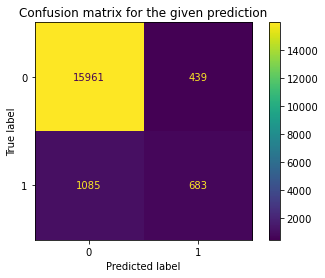

In [83]:
# Evaluation of the model
evaluation(y_test,y_pred)

#### We can clearly see that increasing the weight of the minority class is resulting in a better recall score. So we will go ahead with a lightgbm model because of its inbuilt scale_pos_weight paramenter which works better in case of unbalanced datasets

## Lightgbm Model(with increased weights)

In [91]:
lgbm=LGBMClassifier(scale_pos_weight=3.5)
lg_model=lgbm.fit(x_train,y_train)
y_pred=lg_model.predict(x_test)

Accuracy Score: 0.837956847203875
f1_score: 0.5062059711506205
Precision: 0.3597997138769671
Recall: 0.8535067873303167
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.90     16400
           1       0.36      0.85      0.51      1768

    accuracy                           0.84     18168
   macro avg       0.67      0.84      0.70     18168
weighted avg       0.92      0.84      0.86     18168



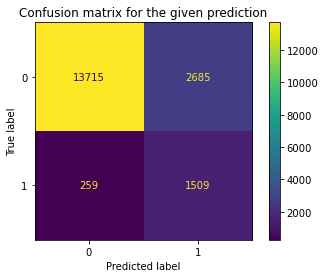

In [92]:
# Evaluation of the model
evaluation(y_test,y_pred)

# Conclusion
#### We now see that we have a much better recall of 0.853 which is pretty great beacause it indicates a case pf reduced false negatives. Though tinkering with class wieghts did have a negative effect on our accuracy. Still we can improve the model with higher weight for hazardous class reducing the acuuracy. So this would be our final model for now.